# Importing necessary libraries

In [1]:
# Standard libraries, pandas for the dataset and the other two for visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Preprocessing and Machine learning libraries for investigating the data and also doing feature selection
# extraction and engineering e.g. using LabelEncoder, also for investigating potential missingness in the data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import ppscore as pps
import missingno as msno
import math as mt
import statistics as stat
from imblearn.over_sampling import SMOTE 

In [362]:
# Libraries for modelling, creating a training and test set and using 3 different ML algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# Libraries for evaluation of performance of ML algorithms
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
# importing dataset
data = pd.read_csv('/Users/davidolumuyiwa/Documents/Datasets/bank/bank-full.csv')

In [6]:
# investigating the data 
data.dtypes # it turns out the data typically consists of either integers or categorical variables -
# which in this case is termed object

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
set(data.marital) # for example the marital column which is deemed an object type consists of three categories
# either divorced, married or single

{'divorced', 'married', 'single'}

In [9]:
print(set(data.age)) # Given that age on the other is not an object but an integer the data type is not
# categorical but discrete, a good investigation of this data type would be such ..

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95}


In [10]:
# these kind of investigations into discrete data will tell you more about the discrete variables nature
# so for example the variance and standard deviation showing how much the data varies and deviaties from the average age
# mean of course showing the average and so on .....
print(max(data.age)) 
print(min(data.age))
print(stat.mean(data.age))
print(stat.median(data.age))
print(stat.stdev(data.age))
print(stat.variance(data.age))

95
18
40.93621021432837
39
10.61876204097542
112.7581072828605


In [11]:
# we also want to investigate the y variable as it is the 'target' variable to be modelled and predicted
set(data.y) # here we see that the target variabe is concerned with whether or not a certain event occured
# yes or no

{'no', 'yes'}

In [12]:
# renaming columns
print(data.columns)

data.rename(columns = {'pdays': 'passed_days', 'poutcome': 'previous_outcomes', 'y':'deposit_requested'}, 
            inplace = True) 
# because the y variable is about whether or not people recorded in this dataset requested deposits for 
# whatever reason, the y variable will be changed to deposits requested

print(data.columns)
# Notice the change in the pdays column to passed_days and also the changes in the other renamed columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'passed_days', 'previous', 'previous_outcomes', 'deposit_requested'],
      dtype='object')


In [13]:
# some further investigation into the data
dimensionality = data.shape
rows = len(data.job)
columns = len(data.columns)

print(dimensionality)
print(rows)
print(columns) # so as can be seen there is a 17x45211 dimension to the data

(45211, 17)
45211
17


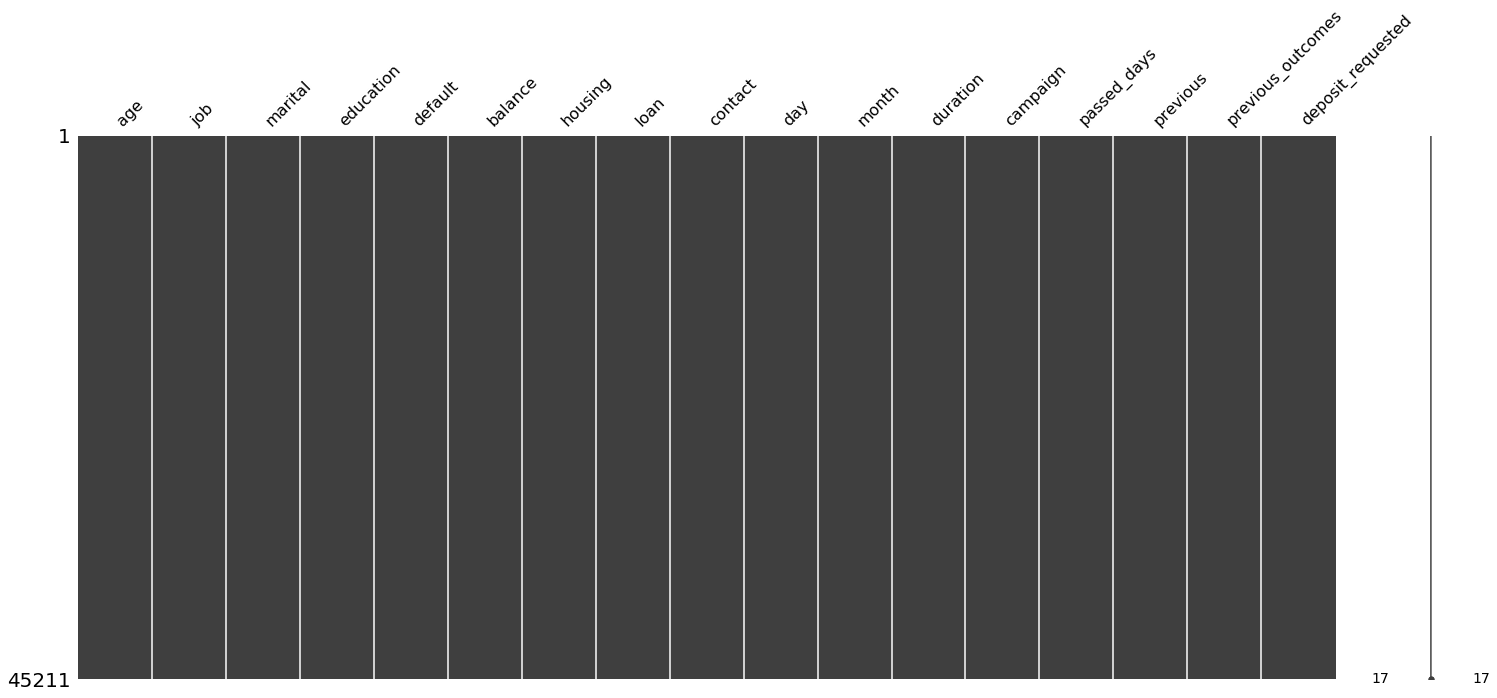

In [14]:
# now to investigate any missingness in the dataset
msno.matrix(data)
# here we can see that there is no missing data within the set if there was the color in the dataset 
# will be shaded differently to indicate this

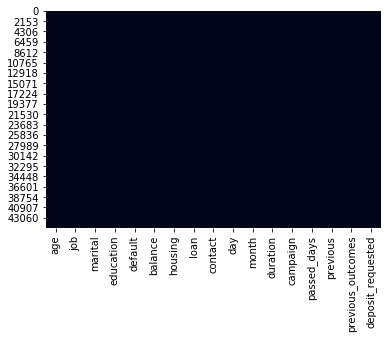

In [15]:
# another option instead of using missingno library is to use the seaborn visualisation library
sns.heatmap(data.isnull(), cbar=False)

# this heatmap shos across all rows and columns any areas where there could be potential missingness
# given that there is any there would an alternate color to illustrate where this is

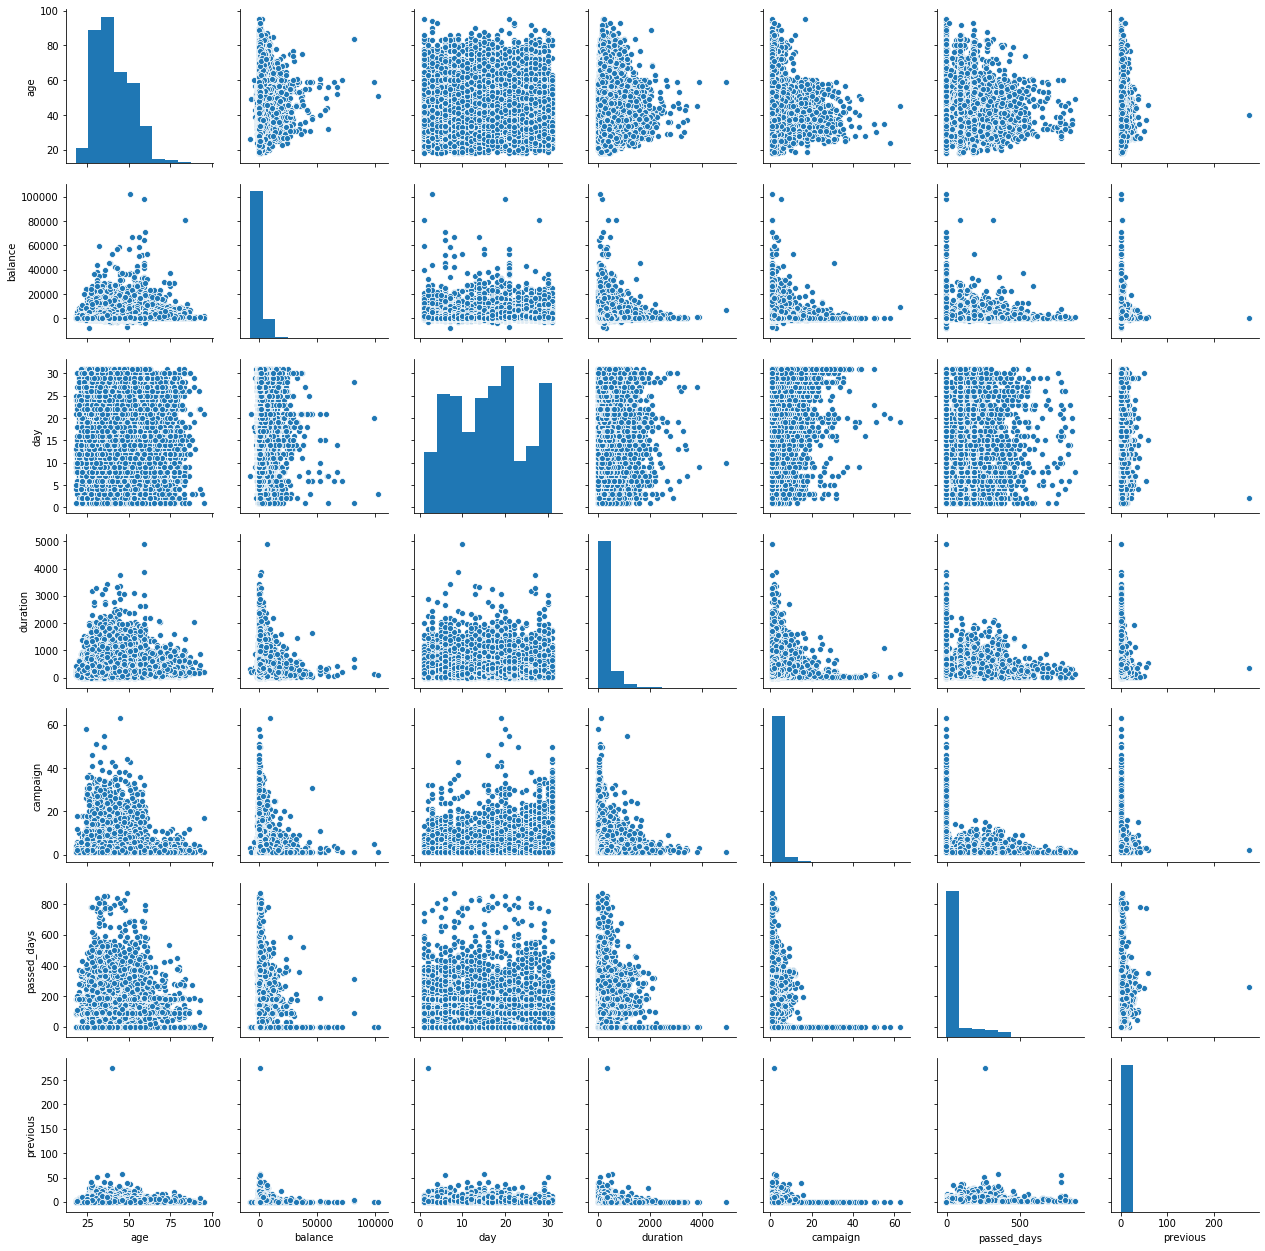

In [16]:
# correlation matrix using a correlogram
sns.pairplot(data) # as can be seen here there is not much collinearity amongst the variables

In [17]:
# another issue that may be faced is that using correlation is detect relationships has its limitation
# one common limitation is the assumption of linearity another is the fact that pearson correlation does not 
# handle categorical variables or data

In [18]:
# As a result the ppscore will be used to detect non-linear relationships amongst variables 
# this will be particularly used for the target variables 

pps.matrix(data)
# looking at the results for the target variable, there seem to be no strong positive or negative relationships
# between the target variable and its covariates
# there seems to be some relations between covariates for example a slightly positive correlation between
# duration and education of 0.59

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,passed_days,previous,previous_outcomes,deposit_requested
age,1.000000,0.123437,1.085919e-01,6.713084e-03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.270159e-05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
job,0.123026,1.000000,6.860202e-02,1.751216e-01,1.023920e-06,0.105374,8.126940e-02,7.620020e-03,7.700031e-02,7.757957e-02,9.530344e-02,0.071126,0.044190,0.039143,0.020143,2.058611e-02,3.725164e-02
marital,0.298370,0.079291,1.000000e+00,6.719462e-07,6.719462e-07,0.031315,6.719462e-07,6.719462e-07,6.719462e-07,1.616310e-03,6.719462e-07,0.067416,0.000824,0.026461,0.002843,6.719462e-07,6.719462e-07
education,0.017266,0.435865,7.044773e-07,1.000000e+00,7.044773e-07,0.092567,7.044773e-07,7.044773e-07,7.044773e-07,7.044773e-07,1.186592e-01,0.058664,0.007255,0.037162,0.006502,7.044773e-07,7.044773e-07
default,0.000011,0.000011,1.073985e-05,1.073985e-05,1.000000e+00,0.000000,1.073985e-05,1.073985e-05,1.073985e-05,1.073985e-05,1.073985e-05,0.000000,0.000011,0.000000,0.000011,1.073985e-05,1.073985e-05
balance,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
housing,0.264038,0.361035,0.000000e+00,2.636001e-01,0.000000e+00,0.198110,1.000000e+00,0.000000e+00,2.717623e-01,2.751588e-01,5.431253e-01,0.190024,0.172333,0.124706,0.008476,6.853965e-02,1.870588e-01
loan,0.000001,0.000001,1.370356e-06,1.370356e-06,1.370356e-06,0.000000,1.370356e-06,1.000000e+00,1.370356e-06,1.370356e-06,1.370356e-06,0.000000,0.000000,0.005804,0.000000,1.370356e-06,1.370356e-06
contact,0.003290,0.004422,6.665703e-07,6.665703e-07,6.665703e-07,0.025417,6.665703e-07,6.665703e-07,1.000000e+00,5.790869e-02,5.150468e-01,0.067106,0.012072,0.000000,0.000000,6.665703e-07,6.665703e-07
day,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.159134e-04,1.688369e-04,0.000000e+00,1.000000e+00,1.298263e-01,0.000000,0.010944,0.003636,0.002107,5.097689e-03,8.647188e-06


# Exploratory Data Analysis

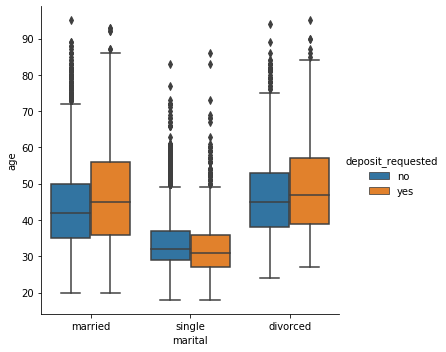

In [19]:
# Doing some exploratory on the target variable to investigate behavioural patterns among groups

sns.catplot(x = 'marital', y = 'age', hue = 'deposit_requested'
           , kind = 'box', data = data)

# So here is a 2-dimensional graphical representation of a 3-dimensional relationship between age, marital status
# and whether or not deposits were requested

# A few things can be gleaned here: First of all among different marital statuses the average age of deposits
# requested or not requested differs and so do the outliers
# So for example for those who are married on average people around the age of approximately 45 tend to
# request deposits, whereas single people tend to be on average a lot more younger around 30
# And notice the outliers in the single marital status start of at a much earlier age than people in divorced
# or married status.

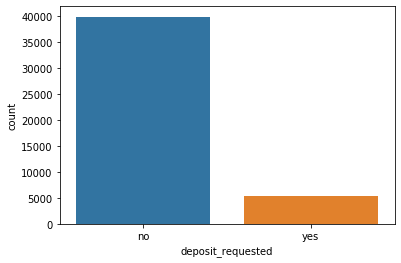

In [20]:
sns.countplot(data.deposit_requested)
# Checking the target variable to check if the data is balanced or imbalanced

In [ ]:
# As can be seen above the data shows that the cases of people getting approved
# requested deposits is disproportionate, there are more no cases than yes
# In order to address this for predictive modelling purposes, there needs to be a balance
# In the 2 different classes, otherwise the predictive potency of the model will be biased
# And the cases of yes would have potentially low recall and precision rates
# In order to do that we need to use the smote library to execute over and under sampling

In [26]:
# Before beginning to use predictive algorithms some feature engineering

In [28]:
# One of the important things about machine learning algorithms is that they
# require integer or numeric data types to operate, strings are not really recognised
# The next thing to is to convert the dataset to numerical representation where they are string
# So for example for the marital variable perhaps labelling each group 1, 2 and 3

In [31]:
# firstly saving initial dataset and converting it to a bunch of numerical and integer types
data1= data

In [32]:
data1.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
passed_days           int64
previous              int64
previous_outcomes    object
deposit_requested    object
dtype: object

In [33]:
le = LabelEncoder() # assigning label encoder library to convert data types

for col in data1.columns.values: # for every column in dataset check the values
    if data1[col].dtypes == 'object': # if the column types are objects
        data1[col] = le.fit_transform(data1[col]) # use the label encoder library
        # to convert object data types to numerical labels

In [34]:
data1.dtypes # notice all the columns have been converted to integer types

age                  int64
job                  int64
marital              int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
contact              int64
day                  int64
month                int64
duration             int64
campaign             int64
passed_days          int64
previous             int64
previous_outcomes    int64
deposit_requested    int64
dtype: object

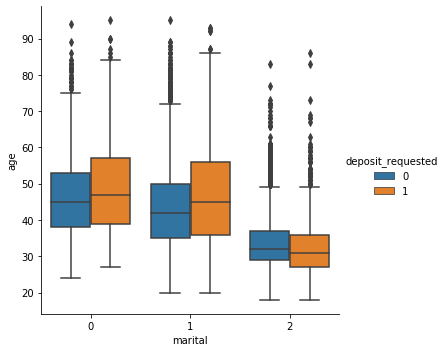

In [35]:
# if you investigate the same plot as before about groups
sns.catplot(x = 'marital', y = 'age', hue = 'deposit_requested'
           , kind = 'box', data = data1)

In [36]:
# Notice they are labelled 0, 1 and 2 and the deposit requested is now 0 and 1

In [37]:
# Now some feature engineering...
X = data1.iloc[:,0:16] # covariates
y = data1.deposit_requested # target variable

In [41]:
bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_)

In [45]:
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores
# Here is a list of the scores showing the importances of covariates for predictability

,0,0
0,age,28.625233
1,job,74.048351
2,marital,94.150026
3,education,199.242825
4,default,22.733923
5,balance,126.572276
6,housing,892.950576
7,loan,211.167395
8,contact,1017.965930
9,day,36.359010


In [52]:
trees = ExtraTreesClassifier()
trees.fit(X,y)

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [54]:
print(trees.feature_importances_)

[0.0967493  0.05869236 0.02408236 0.03852796 0.00256097 0.0923124
 0.02758041 0.00881612 0.02449651 0.09510055 0.0950953  0.25588372
 0.05960873 0.03721676 0.02643892 0.05683763]


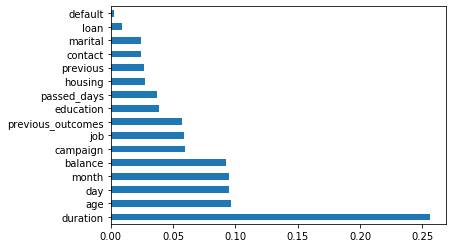

In [57]:
feat_importances = pd.Series(trees.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()
# looking at all the columns it is obvious that given the fit of covariates to the target
# There are certain variables that possess more information that could serve
# to provide some information about the nature of the target variable

In [61]:
# based on some domain knowledge and also the feature selection algorithm results
# some columns will be dropped from the list of covariates

X.drop(['day', 'housing', 'previous', 'contact', 'marital', 'loan', 'default']
       , axis=1)
X.columns
# As you can see the chosen columns are dropped
# this is the process of feature selection
# there are quite a few ways to determine the best features
# either using domain knowledge and also feature selection algorithms

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'passed_days', 'previous', 'previous_outcomes'],
      dtype='object')

# Executing ML tasks for predictive modelling

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# A 70-30 split

In [64]:
pd.value_counts(y_train) # here you can see the imbalance is clearly present
# In order to successfully predict the target classes the classes cannot be 
# too disproportionate

0    27941
1     3706
Name: deposit_requested, dtype: int64

In [65]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [66]:
pd.value_counts(y_train) # some oversampling has occured providing a balance to the target

1    27941
0    27941
dtype: int64

In [67]:
pd.value_counts(y_test)
# the balanced trainset for the target variable will serve as potent
# for predicting with better recall and precision and limiting the rate of
# false positive and false negatives

0    11981
1     1583
Name: deposit_requested, dtype: int64

# Logistic Regression Algorithm

In [68]:
logreg = LogisticRegression() # Assigning logistic regression classifier
logreg.fit(X_train, y_train) # fitting the algorithm to the training set

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred = logreg.predict(X_test) 
# passing the covariates information from the test set to the logreg algorithm
result = pd.DataFrame(confusion_matrix(y_test, pred))
result

,0,1
0,10015,1966
1,524,1059


In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     11981
           1       0.35      0.67      0.46      1583

    accuracy                           0.82     13564
   macro avg       0.65      0.75      0.67     13564
weighted avg       0.88      0.82      0.84     13564



In [74]:
print(accuracy_score(y_test, pred)) # so we got 82% accuracy
# but the f1-score for cases of deposit requested that are yes is pretty low
# 46%

0.8164258330875848


# Lets try another algorithm: Decision Trees

In [83]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None) # hyperparameter tuning
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
dt_pred = dt.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result = pd.DataFrame(confusion_matrix(y_test, dt_pred))
dt_result

,0,1
0,10666,1315
1,706,877


In [85]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     11981
           1       0.40      0.55      0.46      1583

    accuracy                           0.85     13564
   macro avg       0.67      0.72      0.69     13564
weighted avg       0.88      0.85      0.86     13564



In [86]:
print(accuracy_score(y_test, dt_pred))
# 85% accuracy so there is a slight improvement to this metric
# However 46% f1-score shows this classifier is still struggling to handle
# one of the classes again

0.851002654084341


In [94]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=None) # hyperparameter tuning
dt1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
dt_pred1 = dt1.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result1 = pd.DataFrame(confusion_matrix(y_test, dt_pred1))
dt_result1

,0,1
0,10722,1259
1,697,886


In [96]:
print(classification_report(y_test, dt_pred1))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     11981
           1       0.41      0.56      0.48      1583

    accuracy                           0.86     13564
   macro avg       0.68      0.73      0.70     13564
weighted avg       0.88      0.86      0.86     13564



In [97]:
print(accuracy_score(y_test, dt_pred1))
# So a slight improvement in accuracy 85.5% rounded up to 86%
# The precision has improved slightly using the entropy algorithm 
# instead of gini

0.8557947508109702


In [182]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                    ,min_samples_split=2
                    , max_features=12) # hyperparameter tuning
dt2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [183]:
dt_pred2 = dt2.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result2 = pd.DataFrame(confusion_matrix(y_test, dt_pred2))
dt_result2

,0,1
0,10629,1352
1,677,906


In [184]:
print(classification_report(y_test, dt_pred2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     11981
           1       0.40      0.57      0.47      1583

    accuracy                           0.85     13564
   macro avg       0.67      0.73      0.69     13564
weighted avg       0.88      0.85      0.86     13564



In [166]:
print(accuracy_score(y_test, dt_pred2))
# In this case changing the splitter from best to random gives a little 
# decrease in accuracy and f1-score for class 1 to 47%

0.8538779121203185


In [239]:
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                            , min_samples_split=2
                            , class_weight={0:0.35, 1:0.78}
                             ) # hyperparameter tuning
dt3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.78}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [240]:
dt_pred3 = dt3.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result3 = pd.DataFrame(confusion_matrix(y_test, dt_pred3))
dt_result3

,0,1
0,10676,1305
1,706,877


In [241]:
print(classification_report(y_test, dt_pred3))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     11981
           1       0.40      0.55      0.47      1583

    accuracy                           0.85     13564
   macro avg       0.67      0.72      0.69     13564
weighted avg       0.88      0.85      0.86     13564



In [242]:
print(accuracy_score(y_test, dt_pred3))

0.8517398997345915


In [243]:
dt4 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                            , min_samples_split=2
                            , class_weight={0:0.35, 1:0.78}
                            , min_impurity_split = 0.25
                             ) # hyperparameter tuning adding minimum impurity split
dt4.fit(X_train, y_train)

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.78}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.25,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [244]:
dt_pred4 = dt4.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result4 = pd.DataFrame(confusion_matrix(y_test, dt_pred4))
dt_result4

,0,1
0,10410,1571
1,453,1130


In [245]:
print(classification_report(y_test, dt_pred4))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11981
           1       0.42      0.71      0.53      1583

    accuracy                           0.85     13564
   macro avg       0.69      0.79      0.72     13564
weighted avg       0.90      0.85      0.87     13564



In [246]:
print(accuracy_score(y_test, dt_pred4))
# The accuracy levels have reduced a little but is really good 85%
# However tuning the minimum impurity level before split has significantly
# increased the recall rate in target class 1 and also slightly the precision
# rate in target class 0 

0.8507814803892657


In [254]:
dt5 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                            , min_samples_split=2
                            , class_weight={0:0.35, 1:0.78}
                            , min_impurity_split = 0.35
                             ) # hyperparameter tuning adding minimum impurity split
dt5.fit(X_train, y_train)
# How does changing the minimum impurity split impacts model performance

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.78}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.35,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [255]:
dt_pred5 = dt5.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result5 = pd.DataFrame(confusion_matrix(y_test, dt_pred5))
dt_result5

,0,1
0,10333,1648
1,416,1167


In [256]:
print(classification_report(y_test, dt_pred5))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11981
           1       0.41      0.74      0.53      1583

    accuracy                           0.85     13564
   macro avg       0.69      0.80      0.72     13564
weighted avg       0.90      0.85      0.87     13564



In [257]:
print(accuracy_score(y_test, dt_pred5))

0.8478324977882631


In [258]:
dt6 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                            , min_samples_split=2
                            , class_weight={0:0.35, 1:0.78}
                            , min_impurity_split = 0.40
                             ) # hyperparameter tuning adding minimum impurity split
dt6.fit(X_train, y_train)
# How does changing the minimum impurity split impacts model performance

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.78}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.4,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [259]:
dt_pred6 = dt6.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result6 = pd.DataFrame(confusion_matrix(y_test, dt_pred6))
dt_result6

,0,1
0,10248,1733
1,375,1208


In [260]:
print(classification_report(y_test, dt_pred6))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11981
           1       0.41      0.76      0.53      1583

    accuracy                           0.84     13564
   macro avg       0.69      0.81      0.72     13564
weighted avg       0.90      0.84      0.86     13564



In [261]:
print(accuracy_score(y_test, dt_pred6))

0.8445886169271601


In [262]:
dt7 = DecisionTreeClassifier(criterion='entropy', max_depth=None
                            , min_samples_split=2
                            , class_weight={0:0.35, 1:0.78}
                            , min_impurity_split = 0.45
                             ) # hyperparameter tuning adding minimum impurity split
dt7.fit(X_train, y_train)

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.78}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.45,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [263]:
dt_pred7 = dt7.predict(X_test)
# passing covariates to the decision tree algorithm
dt_result7 = pd.DataFrame(confusion_matrix(y_test, dt_pred7))
dt_result7

,0,1
0,9520,2461
1,316,1267


In [264]:
print(classification_report(y_test, dt_pred7))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11981
           1       0.34      0.80      0.48      1583

    accuracy                           0.80     13564
   macro avg       0.65      0.80      0.67     13564
weighted avg       0.89      0.80      0.83     13564



In [265]:
print(accuracy_score(y_test, dt_pred7))

0.7952668829253907


# Now Lets try out the Random Forest Classifier

In [302]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [303]:
rand_pred = rand.predict(X_test)
# passing covariates to the decision tree algorithm
rand_result = pd.DataFrame(confusion_matrix(y_test, rand_pred))
rand_result

,0,1
0,10976,1005
1,599,984


In [304]:
print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11981
           1       0.49      0.62      0.55      1583

    accuracy                           0.88     13564
   macro avg       0.72      0.77      0.74     13564
weighted avg       0.90      0.88      0.89     13564



In [308]:
print(accuracy_score(y_test, rand_pred))

0.8817457976997936


In [321]:
rand1 = RandomForestClassifier(n_estimators=200)
rand1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [325]:
rand_pred1 = rand1.predict(X_test)
# passing covariates to the decision tree algorithm
rand_result1 = pd.DataFrame(confusion_matrix(y_test, rand_pred1))
rand_result1

,0,1
0,10978,1003
1,594,989


In [326]:
print(classification_report(y_test, rand_pred1))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11981
           1       0.50      0.62      0.55      1583

    accuracy                           0.88     13564
   macro avg       0.72      0.77      0.74     13564
weighted avg       0.90      0.88      0.89     13564



In [327]:
print(accuracy_score(y_test, rand_pred1))
# As can be assessed changing the number of trees generated by the forest
# does not improve accuracy further or improve f1-score from 100 trees

0.882261869654969


In [328]:
rand2 = RandomForestClassifier(n_estimators=100, min_impurity_split=0.25)
rand2.fit(X_train, y_train)

/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/davidolumuyiwa/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/davidolumuyiwa/anaconda3/lib/python3

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.25,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [329]:
rand_pred2 = rand2.predict(X_test)
# passing covariates to the decision tree algorithm
rand_result2 = pd.DataFrame(confusion_matrix(y_test, rand_pred2))
rand_result2

,0,1
0,10543,1438
1,479,1104


In [330]:
print(classification_report(y_test, rand_pred2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11981
           1       0.43      0.70      0.54      1583

    accuracy                           0.86     13564
   macro avg       0.70      0.79      0.73     13564
weighted avg       0.90      0.86      0.87     13564



In [331]:
print(accuracy_score(y_test, rand_pred2))
# As can be assessed changing the number of trees generated by the forest
# does not improve accuracy further or improve f1-score from 100 trees

0.8586700088469478


In [355]:
rand3 = RandomForestClassifier(n_estimators=100, criterion='entropy',
                              oob_score=True, verbose=1)
rand3.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=1, warm_start=False)

In [356]:
rand_pred3 = rand3.predict(X_test)
# passing covariates to the decision tree algorithm
rand_result3 = pd.DataFrame(confusion_matrix(y_test, rand_pred3))
rand_result3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


,0,1
0,10967,1014
1,573,1010


In [359]:
print(classification_report(y_test, rand_pred3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11981
           1       0.50      0.64      0.56      1583

    accuracy                           0.88     13564
   macro avg       0.72      0.78      0.75     13564
weighted avg       0.90      0.88      0.89     13564



In [360]:
print(accuracy_score(y_test, rand_pred3))

0.8829991153052197


# Using Gradient Boosted Machine For loss minimization

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, subsample = 0.5,
                               learning_rate=0.3, max_depth=5)
gb.fit(X_train, y_train)

In [ ]:
gb_pred = gb.predict(X_test)
gb_result = pd.DataFrame(confusion_matrix(y_test, gb_pred))
gb_result

In [389]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     11981
           1       0.50      0.67      0.57      1583

    accuracy                           0.88     13564
   macro avg       0.73      0.79      0.75     13564
weighted avg       0.90      0.88      0.89     13564



In [390]:
print(accuracy_score(y_test, gb_pred))

0.884399882040696
